In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from sqlalchemy import create_engine
from sqlalchemy.types import Integer, Text, String, DateTime, Float

database_filepath = './Monthly_Stat_Reports.db'
engine = create_engine('sqlite:///{}'.format(database_filepath))

sqlite_connection = engine.connect()

In [30]:
table_name = 'Monthly_Stat_Reports_Cities'
df.to_sql(
    table_name,
    engine,
    if_exists='replace',
    index=False,
    #dtype=dtypes,
    chunksize=500
)

In [31]:
pd.read_sql_query('''
                  SELECT * FROM Monthly_Stat_Reports_Cities
                  ''', engine)

,City,Townhouse-Condo Attached,Single-Family Detached,New Listings,Pending Sales,Closed Sales,Days on Market Until Sale,Median Sales Price,Average Sales Price,Percent of Original List Price Received,Inventory of Homes for Sale,Year,Month num,Month
0,Alamo,0,1,23.0,NaN,11.0,44,2135000,2369636,97.56,19,2021,1,January
1,Alamo,1,0,NaN,NaN,2.0,50,826500,826500,98.77,0,2021,1,January
2,Blackhawk,0,1,10.0,NaN,9.0,64,2700000,2813144,97.86,13,2021,1,January
3,Blackhawk,1,0,1.0,NaN,NaN,0,0,0,0.00,0,2021,1,January
4,Clayton,0,1,11.0,NaN,9.0,13,1028300,1005356,101.97,7,2021,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,Richmond Annex,1,0,NaN,NaN,1.0,4,330000,330000,100.00,0,2020,12,December
8852,Richmond Country_Club,0,1,5.0,5.0,7.0,8,836000,821000,102.46,1,2020,12,December
8853,Richmond Country_Club,1,0,NaN,NaN,NaN,0,0,0,0.00,0,2020,12,December
8854,El Cerrito,0,1,12.0,10.0,16.0,10,1267500,1213938,124.19,8,2020,12,December


In [7]:
df = pd.read_csv('Monthly_Stat_Reports.csv')
df.head()

,City,Townhouse-Condo Attached,Single-Family Detached,New Listings,Pending Sales,Closed Sales,Days on Market Until Sale,Median Sales Price,Average Sales Price,Percent of Original List Price Received,Inventory of Homes for Sale,Year,Month
0,Alamo,0,1,23.0,NaN,11.0,44,2135000,2369636,97.56,19,2021,1
1,Alamo,1,0,NaN,NaN,2.0,50,826500,826500,98.77,0,2021,1
2,Blackhawk,0,1,10.0,NaN,9.0,64,2700000,2813144,97.86,13,2021,1
3,Blackhawk,1,0,1.0,NaN,NaN,0,0,0,0.00,0,2021,1
4,Clayton,0,1,11.0,NaN,9.0,13,1028300,1005356,101.97,7,2021,1


In [16]:
df.columns

Index(['City', 'Townhouse-Condo Attached', 'Single-Family Detached',
       'New Listings', 'Pending Sales', 'Closed Sales',
       'Days on Market Until Sale', 'Median Sales Price',
       'Average Sales Price', 'Percent of Original List Price Received',
       'Inventory of Homes for Sale', 'Year', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='Median Sales Price'>

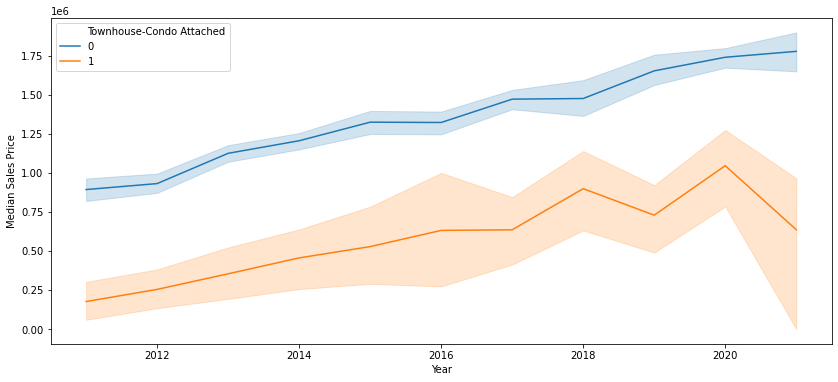

In [18]:
fig, ax = plt.subplots(figsize=(14, 6))

df_city = df[df['City'] == 'Lafayette']

sns.lineplot(x=df_city['Year'],
             y=df_city['Median Sales Price'],
             ax=ax,
             hue=df_city['Townhouse-Condo Attached'])

<AxesSubplot:xlabel='Year', ylabel='Days on Market Until Sale'>

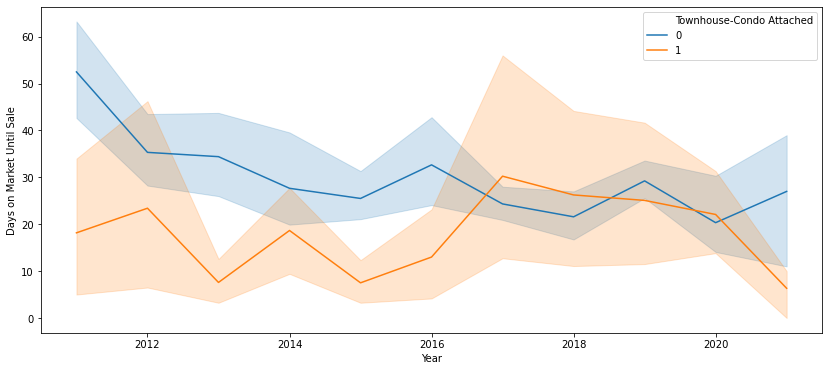

In [20]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(x=df_city['Year'],
             y=df_city['Days on Market Until Sale'],
             ax=ax,
             hue=df_city['Townhouse-Condo Attached'])

In [34]:
df.columns

Index(['City', 'Townhouse-Condo Attached', 'Single-Family Detached',
       'New Listings', 'Pending Sales', 'Closed Sales',
       'Days on Market Until Sale', 'Median Sales Price',
       'Average Sales Price', 'Percent of Original List Price Received',
       'Inventory of Homes for Sale', 'Year', 'Month num', 'Month'],
      dtype='object')